Ex1

In [36]:
import pandas as pd
import numpy as np

df = pd.read_csv("date_alegeri_turul2.csv")
y = df["Vot"].values      # dimensiune (N,)
x1 = df["Varsta"].values   # (N,)
x2 = df["Sex"].values   # (N,)
x3 = df["Educatie"].values     # (N,)
x4 = df["Venit"].values  # (N,)
N = len(y)

In [37]:
import pymc as pm
import arviz as az

with pm.Model() as model1:

    alpha = pm.Normal("alpha", mu=0, sigma=100)
    beta_1 = pm.Normal("beta_1", mu=0, sigma=100)
    beta_2 = pm.Normal("beta_2", mu=0, sigma=100)
    beta_3 = pm.Normal("beta_3", mu=0, sigma=100)
    beta_4 = pm.Normal("beta_4", mu=0, sigma=100)

    sigma = pm.HalfNormal("sigma", sigma=50)

    mu = alpha + beta_1 * x1 + beta_2 * x2 + beta_3 * x3 + beta_4 * x4

    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    idata_g1 = pm.sample(2000, tune=2000, return_inferencedata=True)

Output()

Output()

In [23]:
posterior_g_1 = idata_g1.posterior.stack(samples={"chain", "draw"})
beta_m_1 = posterior_g_1['beta_1'].mean().item()
beta_m_2 = posterior_g_1['beta_2'].mean().item()
beta_m_3 = posterior_g_1['beta_3'].mean().item()
beta_m_4 = posterior_g_1['beta_4'].mean().item()
print(beta_m_1, beta_m_2, beta_m_3, beta_m_4)

0.004075570630272914 -0.11972817841244099 0.08756925036741416 0.06717136608898358


Cele doua variabile care influenteaza cel mai mult rezultatul sunt sexul si educatia, avand beta cu valoarea modulului cea mai mare.

In [24]:
with pm.Model() as model2:

    alpha = pm.Normal("alpha", mu=0, sigma=100)
    beta_2 = pm.Normal("beta_2", mu=0, sigma=100)
    beta_3 = pm.Normal("beta_3", mu=0, sigma=100)

    sigma = pm.HalfNormal("sigma", sigma=50)

    mu = alpha  + beta_2 * x2 + beta_3 * x3

    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    idata_g2 = pm.sample(2000, tune=2000, return_inferencedata=True)

Output()

Output()

Output()

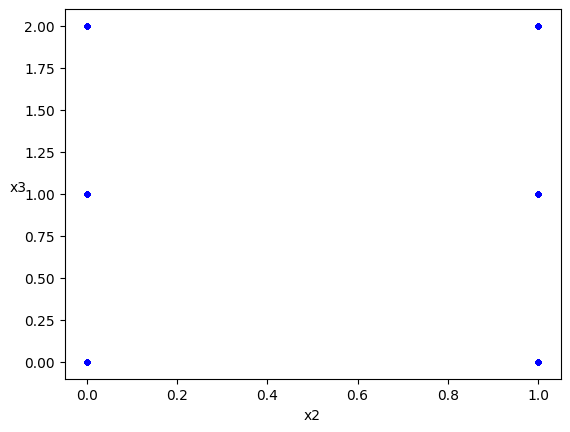

In [35]:
import matplotlib.pyplot as plt

posterior_g_2 = idata_g2.posterior.stack(samples={"chain", "draw"})

alpha_m = posterior_g_2['alpha'].mean().item()
beta_m_2 = posterior_g_2['beta_2'].mean().item()
beta_m_3 = posterior_g_2['beta_3'].mean().item()
ppc = pm.sample_posterior_predictive(idata_g, var_names=['y_obs'], model=model2)

plt.plot(x2, x3, 'b.')
plt.plot(x2, x3, alpha + beta_m_2 * x2 + beta_m_3 * x3, c='k', label=f'y = {alpha_m:.2f} + {beta_m_2:.2f} * x + {beta_m_2:.2f} * x3')
az.plot_hdi(x2, ppc.posterior_predictive['y_pred'], hdi_prob=0.94, color='gray')
az.plot_hdi(x3, ppc.posterior_predictive['y_pred'], color='gray')
plt.xlabel('x2')
plt.ylabel('x3', rotation=0)
plt.show()

Nu am inteles foarte bine acest subpunct.. Granita de decizie ar trebui desenata intr-un spatiu tridimensional, avand ca variabile Vot, Educatie si Sex.

In [ ]:
cmp_df = az.compare({'model_l':idata_g1, 'model_p':idata_g2},method='BB-pseudo-BMA', ic="waic", scale="deviance")
cmp_df

Ex2


Output()

Output()

ERROR:pymc.stats.convergence:There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()

Output()

ERROR:pymc.stats.convergence:There were 806 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


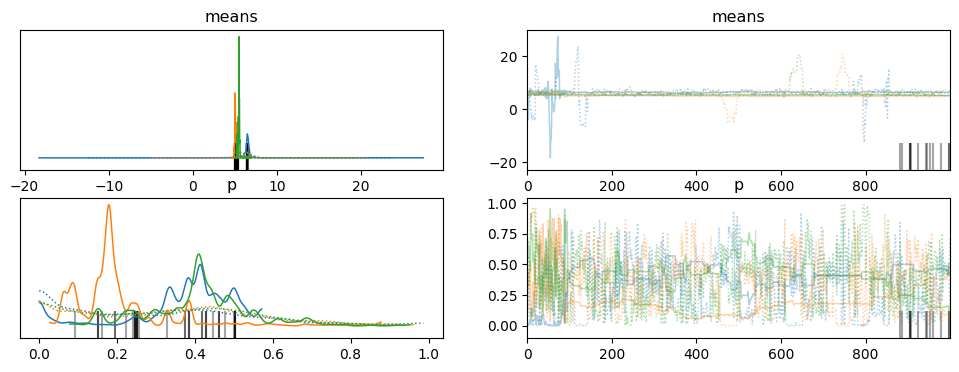

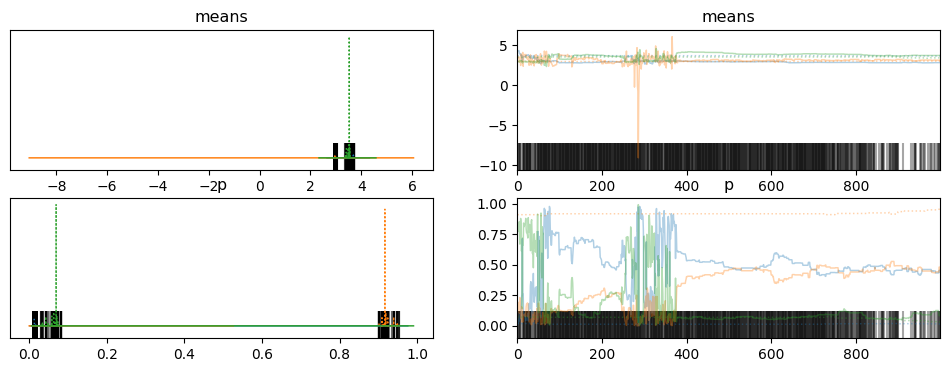

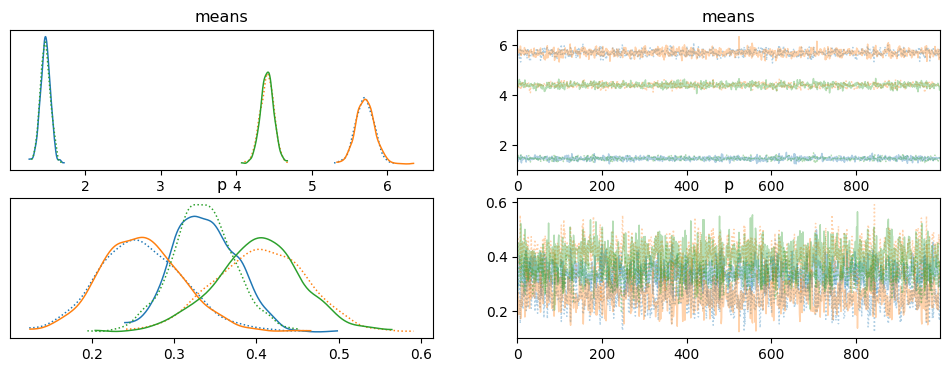

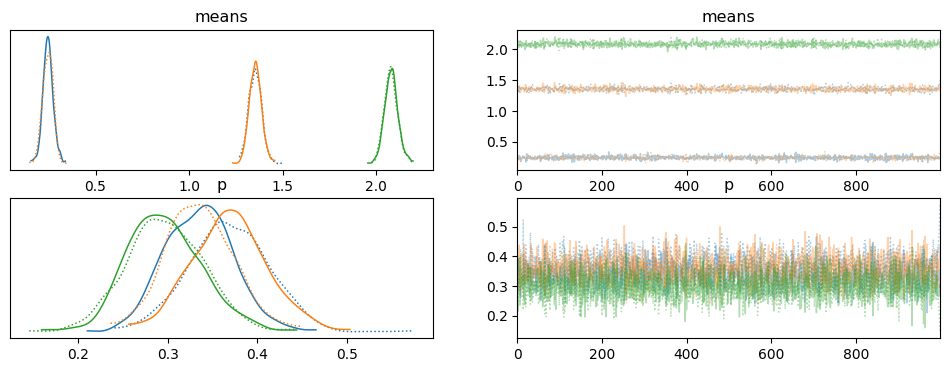

In [42]:
flori = pd.read_csv('iris.csv')

caracteristici = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for car in caracteristici:

  flori_exp = flori[car]
  clusters = 3
  with pm.Model() as model_mg:
    p = pm.Dirichlet('p', a=np.ones(clusters))
    means = pm.Normal('means', mu=flori_exp.mean(), sigma=10, shape=clusters)
    sd = pm.HalfNormal('sigma', sigma=10)
    y = pm.NormalMixture('y', w=p, mu=means, sigma=sd, observed=flori_exp)
    idata_mg = pm.sample(random_seed=123, return_inferencedata=True)
    varnames = ['means', 'p']
    az.plot_trace(idata_mg, varnames)

Uitandu-ne pe graficele afisate, observam ca a doua si a treia caracteristica separe cel mai bine setul de date in 3 categorii. Graficele sunt clar delimitate.